<a href="https://colab.research.google.com/github/lirnara/Trash/blob/Anfisa-tried-to-make-smth/%D0%9F%D1%80%D0%B5%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_EDA_%D0%94%D0%B0%D1%82%D0%B0%D1%81%D0%B5%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

!ATTENTION! При использовании этого кода будьте внимательны с именами файлов и датасетов, которые вы используете - они же - папки, с которыми работает коллаб. Код не очень универсален, если у вас другие наименования датасетов - вам придётся заменить названия и пути к нему, упомянутые в коде ниже.

#Преобразование датасетов в финальный

Устанавливаем библиотеки для действий с разными архивами

In [1]:
!pip install py7zr


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 795.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 32.1 MB/s eta 0:00:00


Если вы загружаете все библиотеки разом, то из дальнейших ячеек строки с этими шагами можно удалить (но я не буду, потому что мне удобнее видеть, что и когда я пользую)

In [2]:
import os
import py7zr
import shutil
import random
import zipfile

Подгружаем архив напарсенного датасета с мед.изображениями

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Final_dataset.zip to Final_dataset.zip


Распаковываем архив

In [ ]:
import os
import py7zr

# Get the name of the uploaded .7z file
file_name = list(uploaded.keys())[0]

# Specify the extraction path
extract_path = '/content/extracted_data'

# Create the extraction directory if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Extract the .7z file
with py7zr.SevenZipFile(file_name, mode='r') as z:
    z.extractall(extract_path)

# List the extracted folders and files
extracted_contents = os.listdir(extract_path)
print("Extracted contents:", extracted_contents)


Заходим в каждую подпапку папки _Parced и переносим все элементы в целевые папки TRAIN/M и TEST/M нашего финального датасета, причём в каждую идёт 50% случайных изображений из общего пула, который был извлечён из всех подпапок внутри _Parced.

In [ ]:
import os
import shutil
import random

# Define input and output directories
input_directory = '/content/extracted_data/_Parced'
output_directory = '/content/extracted_data/DATASET'

# Create train and test directories
train_directory = os.path.join(output_directory, 'TRAIN', 'M')
test_directory = os.path.join(output_directory, 'TEST', 'M')

os.makedirs(train_directory, exist_ok=True)
os.makedirs(test_directory, exist_ok=True)

# Function to copy random images from source to destination
def copy_random_images(source, destination, split_ratio=0.5):
    files = os.listdir(source)
    num_files = len(files)

    # Calculate the number of files to copy for training and testing
    num_train = int(num_files * split_ratio)

    # Randomly shuffle the list of files
    random.shuffle(files)

    # Copy files to the training directory
    for file in files[:num_train]:
        source_path = os.path.join(source, file)
        destination_path = os.path.join(destination, file)
        shutil.copy(source_path, destination_path)

# Create a list to store all images from all subfolders
all_images = []

# Loop through each element of each folder in the input directory
for root, dirs, files in os.walk(input_directory):
    for file in files:
        file_path = os.path.join(root, file)
        all_images.append(file_path)

# Shuffle the list of all images
random.shuffle(all_images)

# Calculate the number of images for training
num_train_images = int(len(all_images) * 0.5)

# Copy files to the training directory
for file_path in all_images[:num_train_images]:
    destination_path = os.path.join(train_directory, os.path.basename(file_path))
    shutil.copy(file_path, destination_path)

# Copy files to the testing directory
for file_path in all_images[num_train_images:]:
    destination_path = os.path.join(test_directory, os.path.basename(file_path))
    shutil.copy(file_path, destination_path)



Подсчёт количества элементов в целевых TRAIN/M TEST/M папках

In [ ]:
import os

# Define the paths to the train and test directories
train_directory = '/content/extracted_data/DATASET/TRAIN/M'
test_directory = '/content/extracted_data/DATASET/TEST/M'

# Function to count items in a directory
def count_items(directory):
    return len(os.listdir(directory))

# Count items in the train and test directories
train_count = count_items(train_directory)
test_count = count_items(test_directory)

# Print the results
print(f"Number of items in TRAIN/M: {train_count}")
print(f"Number of items in TEST/M: {test_count}")


Number of items in TRAIN/M: 324
Number of items in TEST/M: 325


Архивируем этот вариант датасета на всякий случай, чтобы скачать его при необходимости

In [ ]:
import shutil

# Define the paths
dataset_directory = '/content/extracted_data/DATASET'
zip_file_path = '/content/DATASET.zip'

# Create a zip file of the DATASET directory
shutil.make_archive(zip_file_path.replace('.zip', ''), 'zip', dataset_directory)

# Move the zip file to /content
shutil.move(zip_file_path.replace('.zip', '') + '.zip', '/content/DATASET.zip')


'/content/DATASET.zip'

In [5]:
import zipfile
import os

# Get the name of the uploaded .7z file
file_name = list(uploaded.keys())[0]

# Specify the extraction path
extract_path = '/content/extracted_data'

# Create the extraction directory if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Unzip the DATASET.zip file
with zipfile.ZipFile(file_name, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Check if the extraction was successful
if os.path.exists(extract_path):
    print(f"Extraction successful. Dataset is located at: {extract_path}")
else:
    print("Extraction failed. Please check the zip file path and try again.")



Extraction successful. Dataset is located at: /content/extracted_data


Импорт второго архивного файла - Готовый мусорный датасет (датасет2) с просторов Kaggle

In [ ]:
from google.colab import files
uploaded2 = files.upload()

Saving archive.zip to archive.zip


Разархивируем

In [ ]:
import zipfile
import os

# Get the name of the uploaded file
file_name = list(uploaded2.keys())[0]

# Specify the extraction path
extract_path = '/content/extracted_data2'

# Create the extraction directory if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Unzip the uploaded .zip file
with zipfile.ZipFile(file_name, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Check if the extraction was successful
if os.path.exists(extract_path):
    print(f"Extraction successful. Dataset is located at: {extract_path}")
else:
    print("Extraction failed. Please check the zip file path and try again.")

Extraction successful. Dataset is located at: /content/extracted_data2


Также, как и выше, перетащим все файлы в целевые папки уже TRAIN/Other TEST/Other (папки с картинками не мед мусора) нашего финального датасета, соотношение файлов 50% случайных на 50% от общего пула файлов из датасета2

In [ ]:
import os
import shutil
import random

# Define input and output directories
input_directory = '/content/extracted_data2/TrashType_Image_Dataset'
output_directory = '/content/extracted_data'

# Create train and test directories for 'Other'
train_directory = os.path.join(output_directory, 'TRAIN', 'Other')
test_directory = os.path.join(output_directory, 'TEST', 'Other')

os.makedirs(train_directory, exist_ok=True)
os.makedirs(test_directory, exist_ok=True)

# Function to copy random images from source to destination
def copy_random_images(source, destination, split_ratio=0.5):
    files = os.listdir(source)
    num_files = len(files)

    # Calculate the number of files to copy for training and testing
    num_train = int(num_files * split_ratio)

    # Randomly shuffle the list of files
    random.shuffle(files)

    # Copy files to the training directory
    for file in files[:num_train]:
        source_path = os.path.join(source, file)
        destination_path = os.path.join(destination, file)
        shutil.copy(source_path, destination_path)

# Loop through each element of each folder in the input directory
for root, dirs, files in os.walk(input_directory):
    for dir_name in dirs:
        source_folder = os.path.join(root, dir_name)

        # Calculate the split ratio separately for each subfolder
        # to ensure different sets for train and test
        copy_random_images(source_folder, train_directory)
        copy_random_images(source_folder, test_directory)


Проделываем тот же импорт, разархивирование, экстракцию и перенос файлов для ещё одного мусорного датасета с Kaggle (датасет3)

In [ ]:
from google.colab import files
uploaded3 = files.upload()

Saving archive (1).zip to archive (1).zip


In [ ]:
import zipfile
import os

# Get the name of the uploaded .7z file
file_name = list(uploaded3.keys())[0]

# Specify the extraction path
extract_path = '/content/extracted3_data'

# Create the extraction directory if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Unzip the DATASET.zip file
with zipfile.ZipFile(file_name, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Check if the extraction was successful
if os.path.exists(extract_path):
    print(f"Extraction successful. Dataset is located at: {extract_path}")
else:
    print("Extraction failed. Please check the zip file path and try again.")

Extraction successful. Dataset is located at: /content/extracted3_data


In [ ]:
import os
import shutil
import random

# Define input and output directories
input_directory = '/content/extracted3_data/Garbage classification/Garbage classification'
output_directory = '/content/extracted_data'

# Create train and test directories for 'Other'
train_directory = os.path.join(output_directory, 'TRAIN', 'Other')
test_directory = os.path.join(output_directory, 'TEST', 'Other')

os.makedirs(train_directory, exist_ok=True)
os.makedirs(test_directory, exist_ok=True)

# Function to copy random images from source to destination
def copy_random_images(source, destination, split_ratio=0.5):
    files = os.listdir(source)
    num_files = len(files)

    # Calculate the number of files to copy for training and testing
    num_train = int(num_files * split_ratio)

    # Randomly shuffle the list of files
    random.shuffle(files)

    # Copy files to the training directory
    for file in files[:num_train]:
        source_path = os.path.join(source, file)
        destination_path = os.path.join(destination, file)
        shutil.copy(source_path, destination_path)

# Loop through each element of each folder in the input directory
for root, dirs, files in os.walk(input_directory):
    for dir_name in dirs:
        source_folder = os.path.join(root, dir_name)

        # Calculate the split ratio separately for each subfolder
        # to ensure different sets for train and test
        copy_random_images(source_folder, train_directory)
        copy_random_images(source_folder, test_directory)


Посчитаем итоговое количество элементов в каждой папке TRAIN/ и TEST/ . В итоге у нас в каждом подсете должно быть две папки: M - medical & Other - other trash.

In [ ]:
import os

# Define directories
test_directory = '/content/extracted_data/TEST'
train_directory = '/content/extracted_data/TRAIN'

# Function to count elements in each folder
def count_elements_in_folders(directory):
    for root, dirs, files in os.walk(directory):
        folder_path = os.path.relpath(root, directory)
        num_elements = len(files)
        print(f"Folder: {folder_path}, Number of Elements: {num_elements}")

# Count elements in TEST directory
print("Count in TEST directory:")
count_elements_in_folders(test_directory)

# Count elements in TRAIN directory
print("\nCount in TRAIN directory:")
count_elements_in_folders(train_directory)


Count in TEST directory:
Folder: ., Number of Elements: 0
Folder: Other, Number of Elements: 2524
Folder: M, Number of Elements: 325

Count in TRAIN directory:
Folder: ., Number of Elements: 0
Folder: Other, Number of Elements: 2524
Folder: M, Number of Elements: 324


Угу, датасет у нас будет по классам немного АНБАЛАНСНЫЙ, я так понимаю...

Архивируем финальный датасет, скачиваем его себе для дальнейшего использования в среде, где расположена наша модель.

In [ ]:
import shutil

# Define the paths
source_directory = '/content/extracted_data'
zip_file_path = '/content/extracted_data.zip'

# Create a zip file of the extracted_data directory
shutil.make_archive(zip_file_path.replace('.zip', ''), 'zip', source_directory)

# Move the zip file to /content
shutil.move(zip_file_path.replace('.zip', '') + '.zip', '/content/extracted_data.zip')


'/content/extracted_data.zip'

#Визуализация и EDA

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, _ in os.walk('/content/extracted_data/Final_dataset/extracted_data'):
        print(dirname)

/content/extracted_data/Final_dataset/extracted_data
/content/extracted_data/Final_dataset/extracted_data/TRAIN
/content/extracted_data/Final_dataset/extracted_data/TRAIN/M
/content/extracted_data/Final_dataset/extracted_data/TRAIN/Other
/content/extracted_data/Final_dataset/extracted_data/TEST
/content/extracted_data/Final_dataset/extracted_data/TEST/M
/content/extracted_data/Final_dataset/extracted_data/TEST/Other


In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from glob import glob

In [9]:
train_path = "/content/extracted_data/Final_dataset/extracted_data/TRAIN"
test_path = "/content/extracted_data/Final_dataset/extracted_data/TEST"

In [11]:
x_data = []
y_data = []

for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)

        # Check if the image was read successfully
        if img_array is not None:
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            x_data.append(img_array)
            y_data.append(category.split("/")[-1])
        else:
            print(f"Error reading image: {file}")

data = pd.DataFrame({'image': x_data, 'label': y_data})


 12%|█▏        | 84/716 [00:00<00:02, 233.81it/s]

Error reading image: /content/extracted_data/Final_dataset/extracted_data/TRAIN/M/skalpeli-odnorazovye-i-mnogorazovye14.webp


 37%|███▋      | 263/716 [00:01<00:01, 230.67it/s]

Error reading image: /content/extracted_data/Final_dataset/extracted_data/TRAIN/M/katetery-urologicheskie15.webp


 92%|█████████▏| 658/716 [00:07<00:00, 71.13it/s]

Error reading image: /content/extracted_data/Final_dataset/extracted_data/TRAIN/M/katetery-urologicheskie14.webp
Error reading image: /content/extracted_data/Final_dataset/extracted_data/TRAIN/M/drenazhnye-sistemy21.webp


100%|██████████| 2524/2524 [00:13<00:00, 186.66it/s]


In [12]:
data.shape

(3236, 2)

In [13]:
from collections import Counter
Counter(y_data)

Counter({'M': 712, 'Other': 2524})

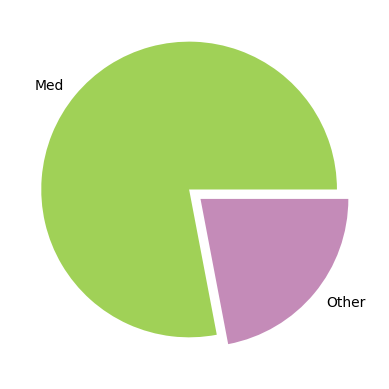

In [14]:
colors = ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),explode=[0.05,0.05],
        labels=['Med', 'Other'], colors= colors)
plt.show()

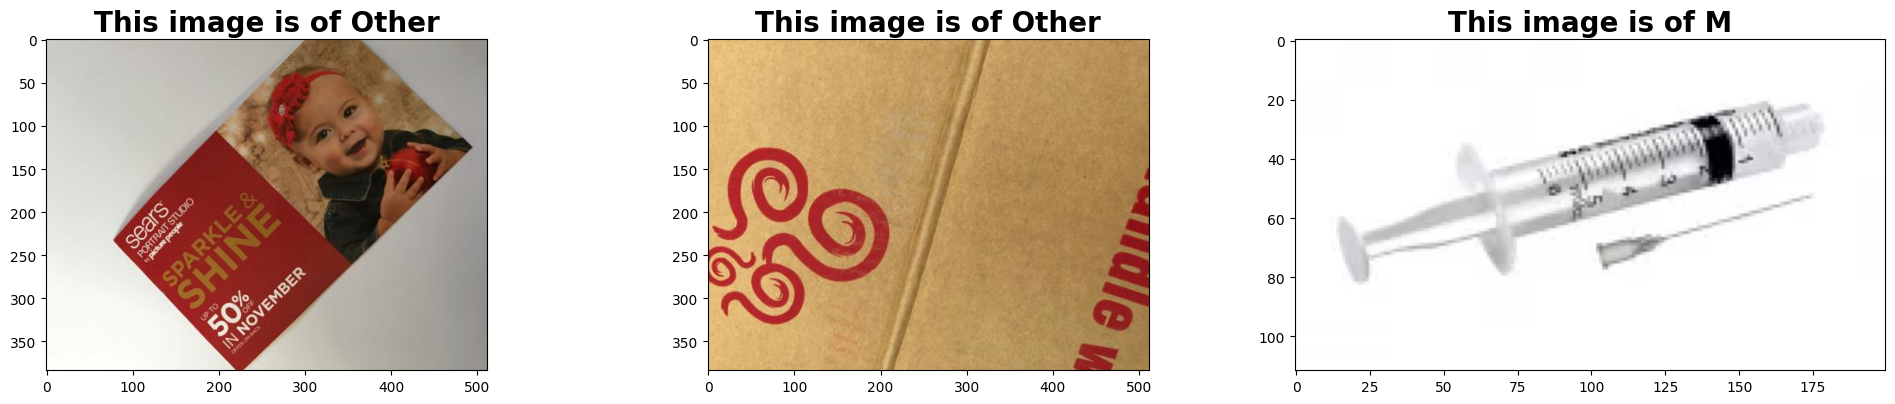

In [18]:
plt.figure(figsize=(20,15))
for i in range(3):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(2000)
    plt.title('This image is of {0}'.format(data.label[index]),fontdict={'size':20,'weight':'bold'})
    plt.imshow(data.image[index])
    plt.tight_layout()

In [19]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  2
